중요한 사실!  
대규모 업데이트인 3rd, 4th, 5th next field 업데이트가 있었던 시기:  
3rd: 2019.12.12  
4th: 2020.06.25  
5th: 2020.12.17  
시즌 7이 시작한 시기가 2020.06.25/시즌7 시작과 함께 업데이트 반영됨.   
4th:   
중거리슛이 힘들어짐.  
전반적인 슈팅의 속도 및 슛 파워 능력치에 따른 슈팅의 속도도 하향 조정됨.  
자동 태클 발동되는 범위를 줄임.  
로빙 스루가 더 유용해짐.  
감아차기 슛 좀 더 유용해짐.  
패스 리시버 설정, 패스 반응성 개선: 패스 방식 조정-유저들이 적응하는 과도기  
  
5th: 시즌 13 초반에 업데이트됨.  
공격수 헤딩슛 정확도 리밸런싱: 헤딩슛 에러율 향상  
감아차기 효과 조정: 슈팅 궤적의 효과 소폭 하향/슈팅 파워 감소   
스탠딩 태클을 성공한 경우에 선수들간 부딪히는 경우를 줄이고 공을 안정적으로 확보  

- 표에는 2019년 시즌 정보도 포함되어 있음.  
=> 2020년 정보만 잘라내기  

- 몰수승, 몰수패는 플레이어들의 시즌별 트렌드를 보는데 적합하지 않음.: 제거하고 정상 종료인 행만 남기기  

- 시즌별로 상위 40명의 랭커 정보만 남기기, final_data에는 상위 랭커와 경기한 플레이어들의 정보도 포함되어 있었기 때문에 상위 랭커들의 시즌별 트렌드를 알아보는데 문제가 있음.   
 -> 이렇게 하려고 했으나 승, 패수가 너무 달라지는 문제가 생김. 시즌별 트렌드를 알아보는데 꼭 아주 상위랭커들의 데이터로만 해야하는 것은 아님. 그냥 처음에 사용했던 final_data로 분석하기로 함.
  
  
- `idea`   
    시즌별로 어떤 플레이 스타일이 유행했을까?  
    시즌별 플레이 특징은 무엇이었나? 어떤 것이 변화했나


---
seasonId                     object  
matchResult                  `범주형`  
matchEndType                 `범주형`  
systemPause                  이산형   
foul                         이산형  
injury                       이산형  
redCards                     이산형  
yellowCards                  이산형  
dribble                      이산형  
cornerKick                   이산형  
possession                   연속형  
offsideCount                 이산형  
averageRating                연속형  
controller                   `범주형`  
shootTotal                   이산형  
effectiveShootTotal          이산형  
shootOutScore                이산형  
goalTotal                    이산형  
goalTotalDisplay             이산형  
ownGoal                      이산형  
shootHeading                 이산형  
goalHeading                  이산형  
shootFreekick                이산형  
goalFreekick                 이산형  
shootInPenalty               이산형  
goalInPenalty                이산형  
shootOutPenalty              이산형  
goalOutPenalty               이산형  
shootPenaltyKick             이산형  
goalPenaltyKick              이산형  
passTry                      이산형  
passSuccess                  이산형  
shortPassTry                 이산형  
shortPassSuccess             이산형  
longPassTry                  이산형  
longPassSuccess              이산형  
bouncingLobPassTry           이산형  
bouncingLobPassSuccess       이산형  
drivenGroundPassTry          이산형  
drivenGroundPassSuccess      이산형  
throughPassTry               이산형  
throughPassSuccess           이산형  
lobbedThroughPassTry         이산형  
lobbedThroughPassSuccess     이산형  
blockTry                     이산형  
blockSuccess                 이산형   
tackleTry                    이산형  
tackleSuccess                이산형  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 불러오기 

In [2]:
pd.set_option('display.max_columns', 100)

In [3]:
df = pd.read_csv('C:\\Users\\박채은\\DSL\\피파온라인4\\final_data.csv', index_col = False)
df

,nickname,seasonId,matchResult,matchEndType,systemPause,foul,injury,redCards,yellowCards,dribble,cornerKick,possession,offsideCount,averageRating,controller,shootTotal,effectiveShootTotal,shootOutScore,goalTotal,goalTotalDisplay,ownGoal,shootHeading,goalHeading,shootFreekick,goalFreekick,shootInPenalty,goalInPenalty,shootOutPenalty,goalOutPenalty,shootPenaltyKick,goalPenaltyKick,passTry,passSuccess,shortPassTry,shortPassSuccess,longPassTry,longPassSuccess,bouncingLobPassTry,bouncingLobPassSuccess,drivenGroundPassTry,drivenGroundPassSuccess,throughPassTry,throughPassSuccess,lobbedThroughPassTry,lobbedThroughPassSuccess,blockTry,blockSuccess,tackleTry,tackleSuccess
0,LilScratch,201916,패,0,0,0,1,0,0,45,0,41,0,0.0,etc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,77,65,63,57,6,5,0,0,2,2,4,1,1,0,7,1,14,7
1,LilScratch,201916,승,0,0,1,0,0,0,54,0,53,0,0.0,etc,5,5,0,3,3,0,0,0,0,0,4,2,1,1,0,0,117,109,100,97,3,1,0,0,0,0,13,11,0,0,3,2,8,3
2,LilScratch,201916,승,1,0,0,0,0,0,14,1,57,0,0.0,etc,4,4,0,3,3,0,1,1,0,0,3,2,1,1,0,0,22,21,18,17,1,1,0,0,0,0,3,3,0,0,1,0,4,4
3,LilScratch,201916,승,1,0,0,0,0,0,51,1,52,0,0.0,etc,8,5,0,4,3,0,1,0,0,0,7,3,1,1,0,0,87,82,76,74,3,2,0,0,3,3,4,3,0,0,3,1,3,2
4,내오른발지단,201916,패,2,1,0,0,0,0,23,0,46,0,0.0,etc,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,33,29,23,20,1,1,0,0,0,0,8,8,0,0,3,0,11,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202955,반창코,201914,승,0,1,0,0,0,0,51,0,56,0,0.0,etc,5,4,0,3,3,0,0,1,0,0,3,3,1,0,0,0,123,108,86,81,8,5,1,0,4,4,22,17,1,1,5,0,8,4
202956,구자철들철들,201914,무,0,0,1,0,0,0,39,2,45,0,0.0,etc,5,5,0,1,1,0,2,1,0,0,3,1,2,0,0,0,93,82,66,62,4,3,0,0,2,1,21,16,0,0,8,2,12,6
202957,재욱형쉽다,201914,승,1,0,1,0,0,1,69,0,53,0,0.0,etc,8,6,0,3,3,0,0,0,0,0,7,3,1,0,0,0,111,100,83,81,3,1,0,0,2,1,19,16,1,1,8,0,12,7
202958,토토의늪에서,201914,패,2,1,2,0,1,1,51,1,47,0,0.0,etc,2,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,98,84,63,58,5,3,0,0,6,4,22,18,2,1,6,0,11,3


In [4]:
# 몰수승, 몰수패 제거
df = df[df['matchEndType'] == 0]
df

,nickname,seasonId,matchResult,matchEndType,systemPause,foul,injury,redCards,yellowCards,dribble,cornerKick,possession,offsideCount,averageRating,controller,shootTotal,effectiveShootTotal,shootOutScore,goalTotal,goalTotalDisplay,ownGoal,shootHeading,goalHeading,shootFreekick,goalFreekick,shootInPenalty,goalInPenalty,shootOutPenalty,goalOutPenalty,shootPenaltyKick,goalPenaltyKick,passTry,passSuccess,shortPassTry,shortPassSuccess,longPassTry,longPassSuccess,bouncingLobPassTry,bouncingLobPassSuccess,drivenGroundPassTry,drivenGroundPassSuccess,throughPassTry,throughPassSuccess,lobbedThroughPassTry,lobbedThroughPassSuccess,blockTry,blockSuccess,tackleTry,tackleSuccess
0,LilScratch,201916,패,0,0,0,1,0,0,45,0,41,0,0.0,etc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,77,65,63,57,6,5,0,0,2,2,4,1,1,0,7,1,14,7
1,LilScratch,201916,승,0,0,1,0,0,0,54,0,53,0,0.0,etc,5,5,0,3,3,0,0,0,0,0,4,2,1,1,0,0,117,109,100,97,3,1,0,0,0,0,13,11,0,0,3,2,8,3
5,LilScratch,201916,승,0,0,0,0,0,0,69,1,63,0,0.0,etc,5,3,0,1,1,0,0,0,0,0,3,0,2,1,0,0,127,116,107,101,6,3,0,0,4,4,9,8,0,0,1,0,12,8
6,LilScratch,201916,패,0,0,2,0,0,0,72,2,54,0,0.0,etc,6,3,0,1,1,0,2,1,0,0,5,1,1,0,0,0,116,108,102,99,3,2,0,0,3,3,5,4,1,0,13,2,12,6
9,LilScratch,201916,패,0,0,2,0,0,0,75,3,61,0,0.0,etc,7,4,0,1,1,0,1,0,0,0,6,1,1,0,0,0,136,123,111,106,7,4,0,0,4,4,10,8,1,1,8,0,14,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202953,재욱형쉽다,201914,무,0,0,0,0,0,0,54,1,46,0,0.0,etc,7,4,0,3,3,0,2,1,1,0,5,3,2,0,0,0,91,81,57,57,9,5,1,1,1,1,17,15,4,2,6,0,5,4
202954,재욱형쉽다,201914,승,0,0,0,0,0,0,55,1,51,0,0.0,etc,8,6,0,4,4,0,1,1,1,0,4,3,4,1,0,0,88,79,60,58,5,4,2,2,2,2,17,13,1,0,15,2,4,2
202955,반창코,201914,승,0,1,0,0,0,0,51,0,56,0,0.0,etc,5,4,0,3,3,0,0,1,0,0,3,3,1,0,0,0,123,108,86,81,8,5,1,0,4,4,22,17,1,1,5,0,8,4
202956,구자철들철들,201914,무,0,0,1,0,0,0,39,2,45,0,0.0,etc,5,5,0,1,1,0,2,1,0,0,3,1,2,0,0,0,93,82,66,62,4,3,0,0,2,1,21,16,0,0,8,2,12,6


In [5]:
df[df['nickname'] == '90min선율']

,nickname,seasonId,matchResult,matchEndType,systemPause,foul,injury,redCards,yellowCards,dribble,cornerKick,possession,offsideCount,averageRating,controller,shootTotal,effectiveShootTotal,shootOutScore,goalTotal,goalTotalDisplay,ownGoal,shootHeading,goalHeading,shootFreekick,goalFreekick,shootInPenalty,goalInPenalty,shootOutPenalty,goalOutPenalty,shootPenaltyKick,goalPenaltyKick,passTry,passSuccess,shortPassTry,shortPassSuccess,longPassTry,longPassSuccess,bouncingLobPassTry,bouncingLobPassSuccess,drivenGroundPassTry,drivenGroundPassSuccess,throughPassTry,throughPassSuccess,lobbedThroughPassTry,lobbedThroughPassSuccess,blockTry,blockSuccess,tackleTry,tackleSuccess
30175,90min선율,202012,패,0,1,1,0,0,0,80,2,50,0,4.21667,gamepad,2,1,0,0,0,0,1,0,0,0,2,0,0,0,0,0,99,87,71,68,7,3,0,0,6,4,12,10,2,2,8,1,15,8
55334,90min선율,202014,승,0,0,1,0,0,0,93,0,56,0,4.32222,gamepad,4,2,0,2,2,0,0,0,0,0,4,2,0,0,0,0,122,110,80,76,12,9,0,0,2,2,25,22,1,1,5,0,27,9
65423,90min선율,202013,패,0,0,1,1,0,0,74,1,49,0,3.97222,gamepad,6,4,0,1,1,0,0,0,0,0,5,1,1,0,0,0,98,88,61,59,9,9,0,0,2,2,21,17,4,1,11,1,16,8
65617,90min선율,202011,패,0,0,0,0,0,0,69,0,48,0,3.92222,gamepad,3,2,0,0,0,0,0,0,0,0,2,0,1,0,0,0,97,89,72,68,6,4,0,0,6,6,9,8,4,3,5,0,10,4
66325,90min선율,202006,패,0,1,0,1,0,0,81,2,49,1,4.09444,gamepad,5,4,0,1,1,0,0,0,0,0,5,1,0,0,0,0,104,96,68,65,8,7,0,0,12,11,15,13,1,0,5,0,17,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177347,90min선율,202002,승,0,0,1,0,0,0,62,1,51,1,4.78333,etc,9,8,0,4,4,0,2,1,0,0,8,4,1,0,0,0,111,102,71,69,3,3,0,0,6,6,26,22,3,2,7,0,14,9
177369,90min선율,202001,패,0,0,1,1,0,0,61,0,50,0,3.67222,etc,3,2,0,0,0,0,0,0,0,0,2,0,1,0,0,0,100,85,58,51,10,6,0,0,1,1,27,25,3,2,11,0,11,6
181710,90min선율,202005,승,0,1,0,0,0,0,92,0,44,0,4.62778,gamepad,4,4,0,3,3,0,1,1,0,0,4,3,0,0,0,0,148,136,112,109,6,4,0,0,5,4,23,19,1,0,4,0,26,13
181766,90min선율,202004,패,0,0,0,0,0,0,66,1,43,0,3.26667,gamepad,4,2,0,0,0,0,0,0,0,0,3,0,1,0,0,0,96,86,62,56,7,6,1,1,6,6,19,16,1,1,9,1,10,6


중복제거  
dataframe.drop_duplicates(columnname, axis=1)


In [6]:
# 패스시도=0 제거하기. 해당 시즌 넥슨 경기 기록 집계 오류로 인해 발생하는 문제점.
df = df[df["passTry"]!=0]

In [7]:
# 각 열별로 중복제거하면 안 됨.
df.drop_duplicates()

,nickname,seasonId,matchResult,matchEndType,systemPause,foul,injury,redCards,yellowCards,dribble,cornerKick,possession,offsideCount,averageRating,controller,shootTotal,effectiveShootTotal,shootOutScore,goalTotal,goalTotalDisplay,ownGoal,shootHeading,goalHeading,shootFreekick,goalFreekick,shootInPenalty,goalInPenalty,shootOutPenalty,goalOutPenalty,shootPenaltyKick,goalPenaltyKick,passTry,passSuccess,shortPassTry,shortPassSuccess,longPassTry,longPassSuccess,bouncingLobPassTry,bouncingLobPassSuccess,drivenGroundPassTry,drivenGroundPassSuccess,throughPassTry,throughPassSuccess,lobbedThroughPassTry,lobbedThroughPassSuccess,blockTry,blockSuccess,tackleTry,tackleSuccess
0,LilScratch,201916,패,0,0,0,1,0,0,45,0,41,0,0.0,etc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,77,65,63,57,6,5,0,0,2,2,4,1,1,0,7,1,14,7
1,LilScratch,201916,승,0,0,1,0,0,0,54,0,53,0,0.0,etc,5,5,0,3,3,0,0,0,0,0,4,2,1,1,0,0,117,109,100,97,3,1,0,0,0,0,13,11,0,0,3,2,8,3
5,LilScratch,201916,승,0,0,0,0,0,0,69,1,63,0,0.0,etc,5,3,0,1,1,0,0,0,0,0,3,0,2,1,0,0,127,116,107,101,6,3,0,0,4,4,9,8,0,0,1,0,12,8
6,LilScratch,201916,패,0,0,2,0,0,0,72,2,54,0,0.0,etc,6,3,0,1,1,0,2,1,0,0,5,1,1,0,0,0,116,108,102,99,3,2,0,0,3,3,5,4,1,0,13,2,12,6
9,LilScratch,201916,패,0,0,2,0,0,0,75,3,61,0,0.0,etc,7,4,0,1,1,0,1,0,0,0,6,1,1,0,0,0,136,123,111,106,7,4,0,0,4,4,10,8,1,1,8,0,14,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202953,재욱형쉽다,201914,무,0,0,0,0,0,0,54,1,46,0,0.0,etc,7,4,0,3,3,0,2,1,1,0,5,3,2,0,0,0,91,81,57,57,9,5,1,1,1,1,17,15,4,2,6,0,5,4
202954,재욱형쉽다,201914,승,0,0,0,0,0,0,55,1,51,0,0.0,etc,8,6,0,4,4,0,1,1,1,0,4,3,4,1,0,0,88,79,60,58,5,4,2,2,2,2,17,13,1,0,15,2,4,2
202955,반창코,201914,승,0,1,0,0,0,0,51,0,56,0,0.0,etc,5,4,0,3,3,0,0,1,0,0,3,3,1,0,0,0,123,108,86,81,8,5,1,0,4,4,22,17,1,1,5,0,8,4
202956,구자철들철들,201914,무,0,0,1,0,0,0,39,2,45,0,0.0,etc,5,5,0,1,1,0,2,1,0,0,3,1,2,0,0,0,93,82,66,62,4,3,0,0,2,1,21,16,0,0,8,2,12,6


In [8]:
df[df['nickname'] == 'Barosulana']

,nickname,seasonId,matchResult,matchEndType,systemPause,foul,injury,redCards,yellowCards,dribble,cornerKick,possession,offsideCount,averageRating,controller,shootTotal,effectiveShootTotal,shootOutScore,goalTotal,goalTotalDisplay,ownGoal,shootHeading,goalHeading,shootFreekick,goalFreekick,shootInPenalty,goalInPenalty,shootOutPenalty,goalOutPenalty,shootPenaltyKick,goalPenaltyKick,passTry,passSuccess,shortPassTry,shortPassSuccess,longPassTry,longPassSuccess,bouncingLobPassTry,bouncingLobPassSuccess,drivenGroundPassTry,drivenGroundPassSuccess,throughPassTry,throughPassSuccess,lobbedThroughPassTry,lobbedThroughPassSuccess,blockTry,blockSuccess,tackleTry,tackleSuccess
45223,Barosulana,202013,승,0,0,2,0,0,0,131,4,53,0,4.11111,gamepad,9,8,3,2,2,0,0,0,0,0,7,1,2,1,0,0,165,157,140,134,3,3,1,0,9,8,11,11,1,1,9,1,23,10


In [9]:
(df['seasonId'].value_counts()).sort_values()

201913      375
201914      957
201915     1261
201917     1566
201916     1578
201919     2446
201918     2840
202001     3771
202002     5448
202003     6198
202004     7399
202005     7742
202006     9528
202007    13412
202009    13797
202008    14372
202010    15382
202014    16786
202011    18076
202012    19495
202013    21154
Name: seasonId, dtype: int64

In [10]:
# 날짜: int->str
df['seasonId']= df['seasonId'].astype('str')
df['seasonId'].dtype

C:\Jupyter\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


dtype('O')

In [11]:
df.isnull().sum()

nickname                    0
seasonId                    0
matchResult                 0
matchEndType                0
systemPause                 0
foul                        0
injury                      0
redCards                    0
yellowCards                 0
dribble                     0
cornerKick                  0
possession                  0
offsideCount                0
averageRating               0
controller                  0
shootTotal                  0
effectiveShootTotal         0
shootOutScore               0
goalTotal                   0
goalTotalDisplay            0
ownGoal                     0
shootHeading                0
goalHeading                 0
shootFreekick               0
goalFreekick                0
shootInPenalty              0
goalInPenalty               0
shootOutPenalty             0
goalOutPenalty              0
shootPenaltyKick            0
goalPenaltyKick             0
passTry                     0
passSuccess                 0
shortPassT

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183583 entries, 0 to 202959
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   nickname                  183583 non-null  object 
 1   seasonId                  183583 non-null  object 
 2   matchResult               183583 non-null  object 
 3   matchEndType              183583 non-null  int64  
 4   systemPause               183583 non-null  int64  
 5   foul                      183583 non-null  int64  
 6   injury                    183583 non-null  int64  
 7   redCards                  183583 non-null  int64  
 8   yellowCards               183583 non-null  int64  
 9   dribble                   183583 non-null  int64  
 10  cornerKick                183583 non-null  int64  
 11  possession                183583 non-null  int64  
 12  offsideCount              183583 non-null  int64  
 13  averageRating             183583 non-null  f

## 데이터 처리

**아직까지는 별거 없었음.**

## 범주형 변수 시각화 => 시즌별로 매치 수가 달라서 단순히 count로 범주형 변수를 보는 것이 의미가 없는 것 같다. 비율로 봐야할 듯!  
각 시즌별로 게임 수가 다를 수 있음.

In [13]:
np.sort(df['seasonId'].unique())

array(['201913', '201914', '201915', '201916', '201917', '201918',
       '201919', '202001', '202002', '202003', '202004', '202005',
       '202006', '202007', '202008', '202009', '202010', '202011',
       '202012', '202013', '202014'], dtype=object)

In [14]:
# 1. 경기결과
df_matchResult = pd.pivot_table(data = df, index = 'seasonId', columns = "matchResult", aggfunc = "size", fill_value = 0)
df_matchResult = df_matchResult.iloc[7:-1, :] 
df_matchResult['승률'] = df_matchResult['승'] / (df_matchResult['승'] + df_matchResult['무'] + df_matchResult['패'])
df_matchResult

matchResult,무,승,패,승률
seasonId,,,,
202001,329,1708,1734,0.452930
202002,404,2573,2471,0.472283
202003,571,2896,2731,0.467247
202004,578,3425,3396,0.462900
202005,734,3535,3473,0.456600
202006,767,4284,4477,0.449622
202007,1171,6164,6077,0.459588
202008,1142,6755,6475,0.470011
202009,1076,6550,6171,0.474741


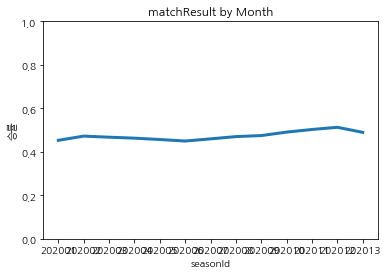

In [15]:
plt.rcParams['font.family'] = 'NanumGothic' # 한글 깨짐 현상 방지
plt.ylim((0,1))
sns.lineplot(data = df_matchResult['승률'], linewidth = 3).set_title("matchResult by Month")

plt.show()

### 1. 경기 결과  
- 시각화를 통해 알 수 있는 사실   
    1. 무승부 결과가 승, 패 결과보다 적다.   

In [16]:
# controller 
df_controller = pd.pivot_table(data = df, index = 'seasonId', columns = "controller", aggfunc = "size", fill_value = 0)
df_controller = df_controller.iloc[7:-1, :]
df_controller

controller,etc,gamepad,keyboard
seasonId,,,
202001,3771,0,0
202002,5448,0,0
202003,1945,3021,1232
202004,0,5404,1995
202005,0,5559,2183
202006,0,6960,2568
202007,0,10020,3392
202008,0,10982,3390
202009,0,10826,2971


# top 40 데이터에서는 게임패드 사용 비율 거의 85~90% 정도였는데 일반 랭커로 내려오니 확실히 게임패드 사용 비율이 줄었다.

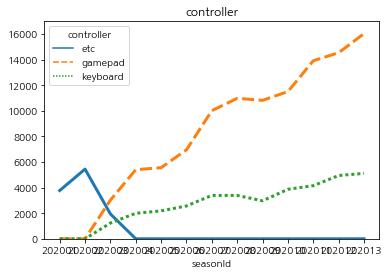

In [17]:
plt.rcParams['font.family'] = 'NanumGothic' # 한글 깨짐 현상 방지
plt.ylim((0,17000))
sns.lineplot(data = df_controller, linewidth = 3).set_title("controller")

plt.show()

### 2. controller      
202001, 202002에서는 gamepad와 keyboard 사용 전혀 하지 않은 것으로 나오는데 말이 안 되는 것 같음.  
`gamepad와 keyboard 사용자를 따로 구분하기 시작했던게 202003이 아닐까 싶음.`    
202004부터는 컨트롤러로 etc(기타)를 사용하기 보다는 gamepad와 keyboard를 절대적으로 많이 사용함을 확인할 수 있다.    
202004부터 사용한 gamepad와 keyboard의 비율을 보면 `게임패드 사용비율이 훨씬 높다는 것을 알 수 있다.`     

게임패드는 따로 구매를 해야함에도 불구하고 게임패드로 게임하는 유저들이 훨씬 많음.->게임패드가 게임에 더 유리함을 확인할 수 있다..    
피씨방 등에서는 키보드로 게임을 해야하는 경우가 많으니 유저들이 키보드로도 높은 랭킹을 유지하는 것이 가능하도록 만들면 좋을 것 같다. 


## 이제 수치형자료!

### 4. dribble  
202004부터 60대 단위->90대 단위로 올랐다.  
플레이어들이 시즌4가 되며 시즌 시작할 때 적용되었던 업데이트에 적응이 많이 되면서 게임을 더 잘하게 되었기 때문에 드리블 단위 올라간 것으로 추측   
  
### 5. shootHeading/goalHeading  
202007, 202013에 줄어드는 것을 알 수 있음.  
202007 업데이트에서 전반적인 슈팅의 속도 및 슛 파워 능력치에 따른 슈팅의 속도도 하향 조정됨.  
202013에 줄어드는 이유는 5th  next field 업데이트(헤딩슛 에러율 향상)가 시즌 13 중간에 진행되었기 때문이라고 생각할 수 있음.  
 
### 6. pass 
<shortPassTry / shortPassSuccess>  
<longPassTry/longPassSuccess>  
<throughPassTry/throughPassSuccess>  
202007-202009에 랭커들이 갑자기 패스를 아주 적게 시도했다고 말하기는 어려움.    
4th 업데이트 후 패스 방식 조정-유저들이 적응하는 과도기였거나 게임 자체의 문제일 수도  

In [18]:
# 시즌별로 묶기
df_month = df.groupby('seasonId').mean()
df_month = df_month.iloc[7:-1, :]
del df_month['matchEndType']
df_month 

,systemPause,foul,injury,redCards,yellowCards,dribble,cornerKick,possession,offsideCount,averageRating,shootTotal,effectiveShootTotal,shootOutScore,goalTotal,goalTotalDisplay,ownGoal,shootHeading,goalHeading,shootFreekick,goalFreekick,shootInPenalty,goalInPenalty,shootOutPenalty,goalOutPenalty,shootPenaltyKick,goalPenaltyKick,passTry,passSuccess,shortPassTry,shortPassSuccess,longPassTry,longPassSuccess,bouncingLobPassTry,bouncingLobPassSuccess,drivenGroundPassTry,drivenGroundPassSuccess,throughPassTry,throughPassSuccess,lobbedThroughPassTry,lobbedThroughPassSuccess,blockTry,blockSuccess,tackleTry,tackleSuccess
seasonId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
202001,0.323522,0.639883,0.149828,0.005304,0.042429,59.837974,1.330682,50.049854,0.299655,4.208216,5.420313,4.153805,0.241050,1.739061,1.760806,0.014320,1.116945,0.361177,0.084593,0.006895,3.894193,1.450544,1.413949,0.246884,0.053567,0.041634,114.845399,103.994696,87.945903,83.055688,7.153540,4.920976,0.058605,0.025723,3.542296,3.165208,13.693185,11.787324,1.533280,1.039777,7.090427,0.634049,13.296208,7.008751
202002,0.227606,0.631791,0.161894,0.006608,0.039464,59.454846,1.399046,49.836821,0.332232,4.154928,5.452276,4.225404,0.285426,1.749633,1.765786,0.017438,1.040749,0.341777,0.102974,0.011564,3.860683,1.429883,1.470264,0.277717,0.055066,0.042034,115.823789,104.880874,89.503488,84.472651,7.011747,4.790565,0.045521,0.020191,3.547357,3.163179,13.370044,11.438142,1.457048,0.996145,7.338840,0.636197,12.924927,6.961454
202003,0.224911,0.616489,0.160213,0.005002,0.041949,66.360923,1.417393,49.879639,0.330106,4.147472,5.591158,4.314295,0.231688,1.767990,1.787996,0.015973,1.168441,0.360762,0.092772,0.010487,3.825266,1.412230,1.661665,0.318813,0.048887,0.036947,114.105357,103.233140,87.407067,82.531946,7.332849,5.030494,0.047757,0.019684,3.489029,3.121813,13.414489,11.505486,1.496128,1.023717,7.425621,0.645369,13.097773,6.888674
202004,0.210974,0.637924,0.156778,0.004460,0.043384,86.577781,1.413434,49.767942,0.353561,4.154705,5.573186,4.242465,0.246925,1.782403,1.803892,0.021354,1.257873,0.429518,0.091093,0.009596,3.786728,1.435599,1.669955,0.309501,0.050412,0.037302,114.146777,103.094337,85.924855,81.010812,7.564401,5.150696,0.048926,0.022435,3.786187,3.375321,14.398432,12.472361,1.488309,1.062711,7.390053,0.633599,13.360724,7.101230
202005,0.232627,0.644924,0.175536,0.005812,0.037458,87.187548,1.431413,50.017825,0.367476,4.159941,5.500387,4.260269,0.236244,1.796177,1.815422,0.017050,1.241540,0.431413,0.079954,0.007492,3.799923,1.460604,1.583312,0.298631,0.047662,0.036941,115.531516,104.369155,86.497029,81.553604,7.406872,5.066391,0.041075,0.018471,3.927796,3.522991,15.244898,13.199303,1.426505,1.008396,7.366314,0.626711,13.574787,7.173469
202006,0.219983,0.633711,0.163833,0.004198,0.035474,87.441226,1.328715,49.894312,0.367024,4.146282,5.220403,4.071998,0.217359,1.767422,1.787993,0.018367,1.078505,0.389694,0.073153,0.006507,3.705814,1.456129,1.393682,0.274244,0.050483,0.037049,116.418136,105.165197,87.118493,82.091730,7.307515,5.113665,0.052582,0.023195,3.827666,3.399244,15.673174,13.542401,1.406591,0.994962,7.403862,0.603589,14.012594,7.444689
202007,0.198404,0.664852,0.164778,0.003579,0.036833,90.416194,1.253281,49.985535,0.379138,4.131796,4.992619,3.894647,0.257754,1.646958,1.667686,0.021175,0.657620,0.214808,0.088801,0.010513,3.615419,1.363182,1.249180,0.235684,0.061587,0.048091,118.667984,107.515285,32.284969,30.160453,1.890098,1.574635,0.020728,0.009171,1.552863,1.313302,6.711005,5.847152,0.816582,0.563451,7.516627,0.618103,13.825529,6.994706
202008,0.203729,0.689187,0.160173,0.004801,0.036460,90.175758,1.351169,50.206582,0.357640,4.141224,5.223142,4.062135,0.262803,1.701433,1.723838,0.023448,0.849360,0.280198,0.089480,0.010019,3.739076,1.407459,1.352700,0.244921,0.064013,0.049054,118.674715,107.495129,62.858962,58.784442,3.678820,3.044670,0.035694,0.015168,2.993807,2.546271,13.957069,12.180072,1.529641,1.068397,7.382549,0.609310,13.928890,7.058030
202009,0.191998,0.7

In [19]:
import copy
df_new = copy.deepcopy(df)

## median

In [20]:
# median
df_month1 = df_new.groupby('seasonId').median()
df_month1 = df_month1.iloc[7:-1, :]
del df_month1['matchEndType']
df_month1

,systemPause,foul,injury,redCards,yellowCards,dribble,cornerKick,possession,offsideCount,averageRating,shootTotal,effectiveShootTotal,shootOutScore,goalTotal,goalTotalDisplay,ownGoal,shootHeading,goalHeading,shootFreekick,goalFreekick,shootInPenalty,goalInPenalty,shootOutPenalty,goalOutPenalty,shootPenaltyKick,goalPenaltyKick,passTry,passSuccess,shortPassTry,shortPassSuccess,longPassTry,longPassSuccess,bouncingLobPassTry,bouncingLobPassSuccess,drivenGroundPassTry,drivenGroundPassSuccess,throughPassTry,throughPassSuccess,lobbedThroughPassTry,lobbedThroughPassSuccess,blockTry,blockSuccess,tackleTry,tackleSuccess
seasonId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
202001,0.0,0.0,0.0,0.0,0.0,58.0,1.0,50.0,0.0,4.17778,5.0,4.0,0.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,0.0,111.0,100.0,85.0,80.0,7.0,4.0,0.0,0.0,3.0,2.0,13.0,11.0,1.0,1.0,7.0,0.0,13.0,7.0
202002,0.0,0.0,0.0,0.0,0.0,58.0,1.0,50.0,0.0,4.15000,5.0,4.0,0.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,0.0,112.0,101.0,86.0,81.0,7.0,4.0,0.0,0.0,3.0,3.0,13.0,11.0,1.0,1.0,7.0,0.0,12.0,7.0
202003,0.0,0.0,0.0,0.0,0.0,62.0,1.0,50.0,0.0,4.13889,5.0,4.0,0.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,0.0,111.0,101.0,86.0,81.0,7.0,4.0,0.0,0.0,3.0,2.0,13.0,11.0,1.0,1.0,7.0,0.0,13.0,7.0
202004,0.0,0.0,0.0,0.0,0.0,85.0,1.0,50.0,0.0,4.16111,5.0,4.0,0.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,111.0,100.0,84.0,79.0,7.0,5.0,0.0,0.0,3.0,3.0,13.0,12.0,1.0,1.0,7.0,0.0,13.0,7.0
202005,0.0,0.0,0.0,0.0,0.0,85.0,1.0,50.0,0.0,4.15000,5.0,4.0,0.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,0.0,112.0,102.0,84.0,79.0,7.0,5.0,0.0,0.0,3.0,3.0,14.0,12.0,1.0,1.0,7.0,0.0,13.0,7.0
202006,0.0,0.0,0.0,0.0,0.0,85.0,1.0,50.0,0.0,4.14444,5.0,4.0,0.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,113.0,103.0,85.0,80.0,7.0,4.0,0.0,0.0,3.0,3.0,15.0,13.0,1.0,1.0,7.0,0.0,13.0,7.0
202007,0.0,0.0,0.0,0.0,0.0,88.0,1.0,50.0,0.0,4.12778,5.0,4.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,115.0,105.0,16.5,15.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,7.0,0.0,13.0,7.0
202008,0.0,0.0,0.0,0.0,0.0,88.0,1.0,50.0,0.0,4.14444,5.0,4.0,0.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,115.0,105.0,61.0,57.0,3.0,2.0,0.0,0.0,2.0,2.0,13.0,11.0,1.0,1.0,7.0,0.0,13.0,7.0
202009,0.0,0.0,0.0,0.0,0.0,87.0,1.0,50.0,0.0,4.13889,5.0,4.0,0.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,0.0,115.0,104.0,37.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,5.0,0.0,0.0,7.0,0.0,14.0,7.0


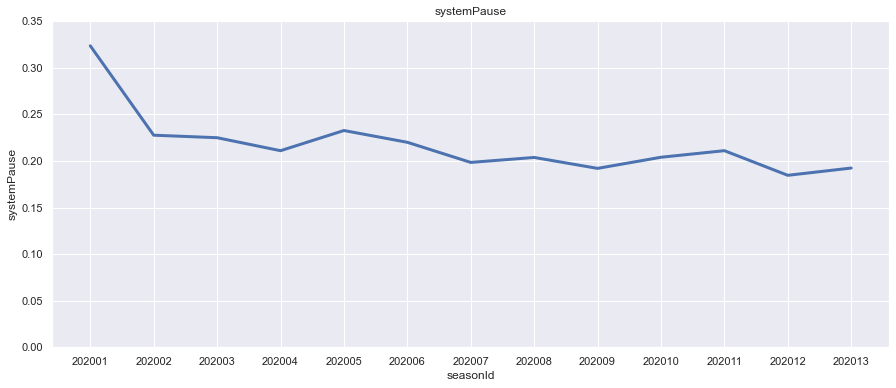

In [21]:
# 3. systemPause  
sns.set(rc={'figure.figsize':(15, 6)})

plt.ylim((0, 0.35))
sns.lineplot(data = df_month['systemPause'], linewidth = 3).set_title("systemPause")

plt.show()

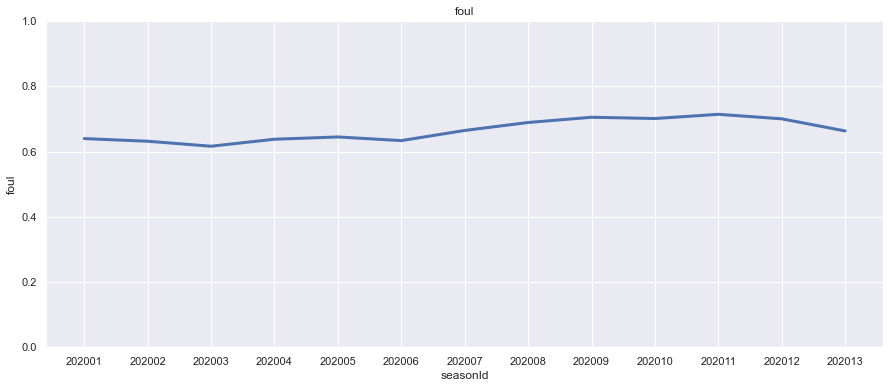

In [22]:
# 4. foul
sns.set(rc={'figure.figsize':(15, 6)})

plt.ylim((0, 1))
sns.lineplot(data = df_month['foul'], linewidth = 3).set_title("foul")

plt.show()

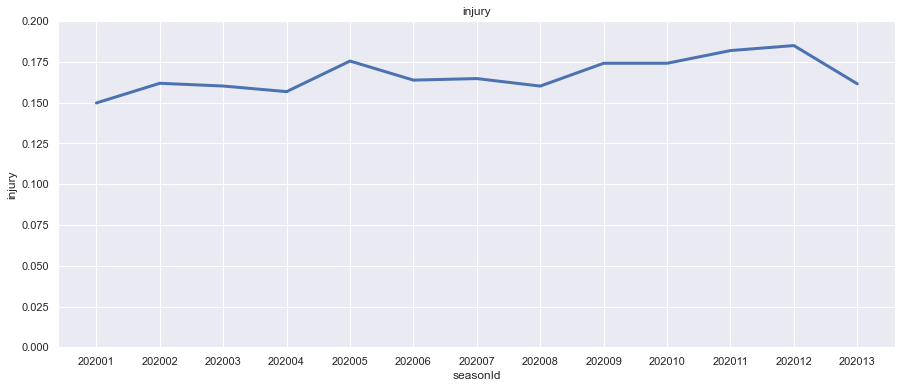

In [23]:
# 5. injury
sns.set(rc={'figure.figsize':(15, 6)})

plt.ylim((0, 0.2))
sns.lineplot(data = df_month['injury'], linewidth = 3).set_title("injury")

plt.show()

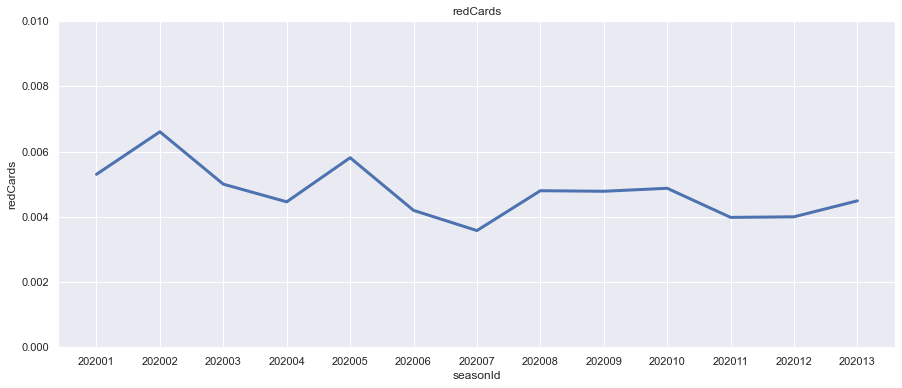

In [24]:
# 6. redCards
sns.set(rc={'figure.figsize':(15, 6)})

plt.ylim((0, 0.01))
sns.lineplot(data = df_month['redCards'], linewidth = 3).set_title("redCards")

plt.show()

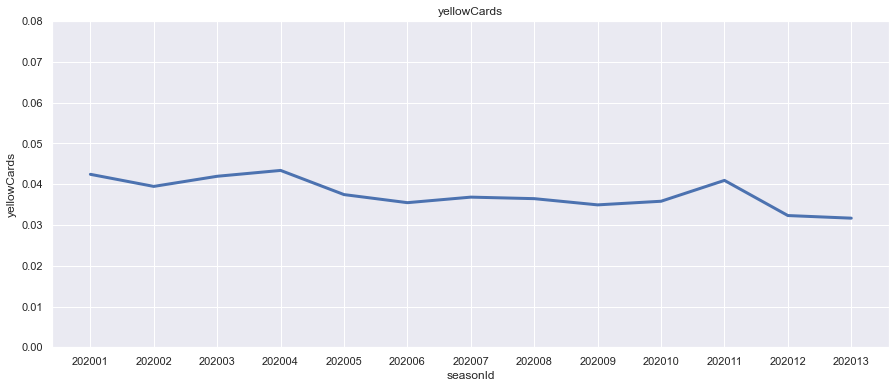

In [25]:
# 7. yellowCards
sns.set(rc={'figure.figsize':(15, 6)})

plt.ylim((0, 0.08))
sns.lineplot(data = df_month['yellowCards'], linewidth = 3).set_title("yellowCards")

plt.show()

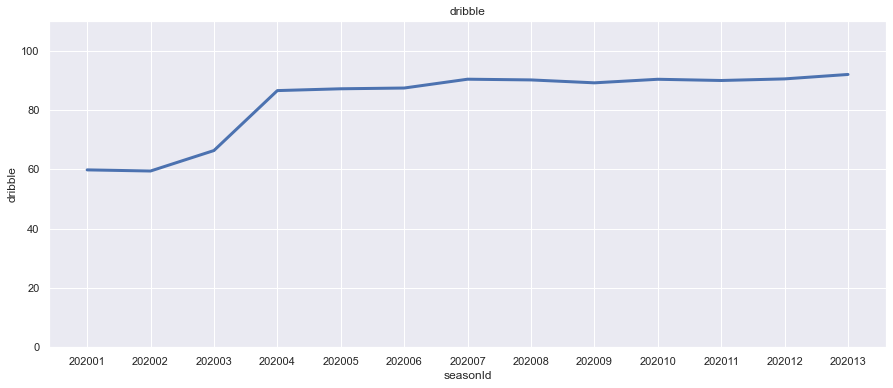

In [26]:
# 8. dribble
sns.set(rc={'figure.figsize':(15, 6)})

plt.ylim((0, 110))
sns.lineplot(data = df_month['dribble'], linewidth = 3).set_title("dribble")

plt.show()

### 4. dribble  
202004부터 60대 단위->90대 단위로 올랐다.  
플레이어들이 시즌4가 되며 시즌 시작할 때 적용되었던 업데이트에 적응이 많이 되면서 게임을 더 잘하게 되었기 때문에 드리블 단위 올라간 것으로 추측


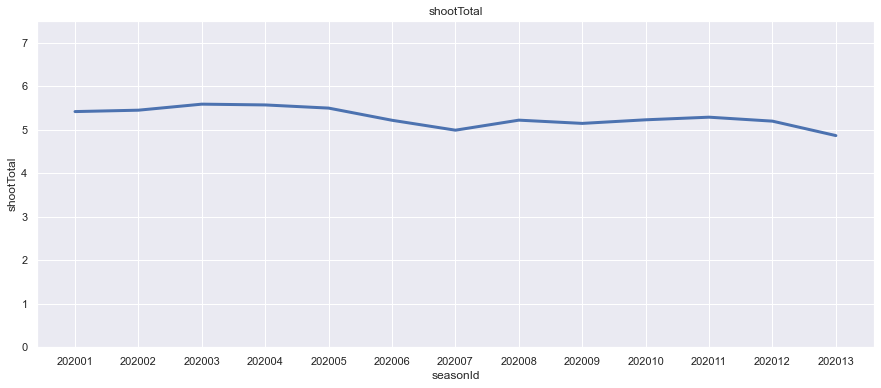

In [27]:
# 13. shootTotal
sns.set(rc={'figure.figsize':(15, 6)})

plt.ylim((0,  7.5))
sns.lineplot(data = df_month['shootTotal'], linewidth = 3).set_title("shootTotal")

plt.show()

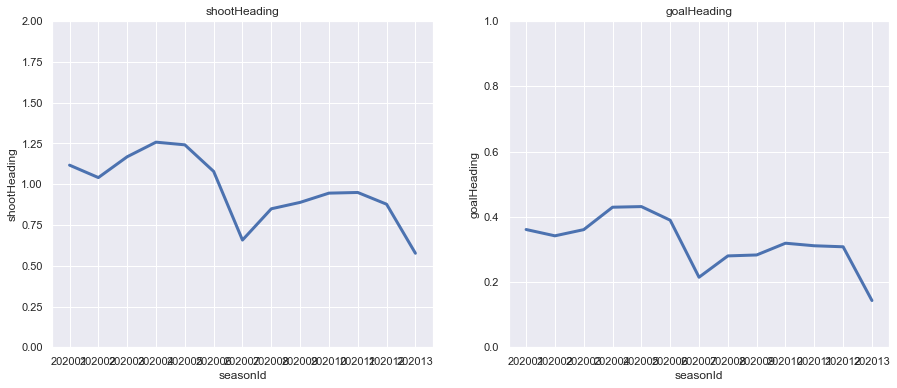

In [28]:
# shootHeading/goalHeading
sns.set(rc={'figure.figsize':(15, 6)})

plt.subplot(1,2,1)
plt.ylim((0,  2))
sns.lineplot(data = df_month['shootHeading'], linewidth = 3).set_title("shootHeading")

plt.subplot(1,2,2)
plt.ylim((0,  1))
sns.lineplot(data = df_month['goalHeading'], linewidth = 3).set_title("goalHeading")

plt.show()

### 5. shootHeading/goalHeading  
202007, 202013에 줄어드는 것을 알 수 있음.  
202007 업데이트에서 전반적인 슈팅의 속도 및 슛 파워 능력치에 따른 슈팅의 속도도 하향 조정됨.  
202013에 줄어드는 이유는 5th  next field 업데이트(헤딩슛 에러율 향상)가 시즌 13 중간에 진행되었기 때문이라고 생각할 수 있음.  

In [29]:
# 성공비율로 바꾸기
df_month['PassSuccess_rate'] = df_month['passSuccess'] / df_month['passTry']
df_month['shortPassSuccess_rate'] = df_month['shortPassSuccess'] / df_month['shortPassTry']
df_month['longPassSuccess_rate'] = df_month['longPassSuccess'] / df_month['longPassTry']
df_month['bouncingLobPassSuccess_rate'] = df_month['bouncingLobPassSuccess'] / df_month['bouncingLobPassTry']
df_month['drivenGroundPassSuccess_rate'] = df_month['drivenGroundPassSuccess'] / df_month['drivenGroundPassTry']
df_month['throughPassSuccess_rate'] = df_month['throughPassSuccess'] / df_month['throughPassTry']
df_month['lobbedThroughPassSuccess_rate'] = df_month['lobbedThroughPassSuccess'] / df_month['lobbedThroughPassTry']
df_month['blockSuccess_rate'] = df_month['blockSuccess'] / df_month['blockTry']
df_month['tackleSuccess_rate'] = df_month['tackleSuccess'] / df_month['tackleTry']

In [30]:
# 성공비율로 바꾸기
# df['PassSuccess_rate'] = df['passSuccess'] / df['passTry']
# df['shortPassSuccess_rate'] = df['shortPassSuccess'] / df['shortPassTry']
# df['longPassSuccess_rate'] = df['longPassSuccess'] / df['longPassTry']
# df['bouncingLobPassSuccess_rate'] = df['bouncingLobPassSuccess'] / df['bouncingLobPassTry']
# df['drivenGroundPassSuccess_rate'] = df['drivenGroundPassSuccess'] / df['drivenGroundPassTry']
# df['throughPassSuccess_rate'] = df['throughPassSuccess'] / df['throughPassTry']
# df['lobbedThroughPassSuccess_rate'] = df['lobbedThroughPassSuccess'] / df['lobbedThroughPassTry']
# df['blockSuccess_rate'] = df['blockSuccess'] / df['blockTry']
# df['tackleSuccess_rate'] = df['tackleSuccess'] / df['tackleTry']


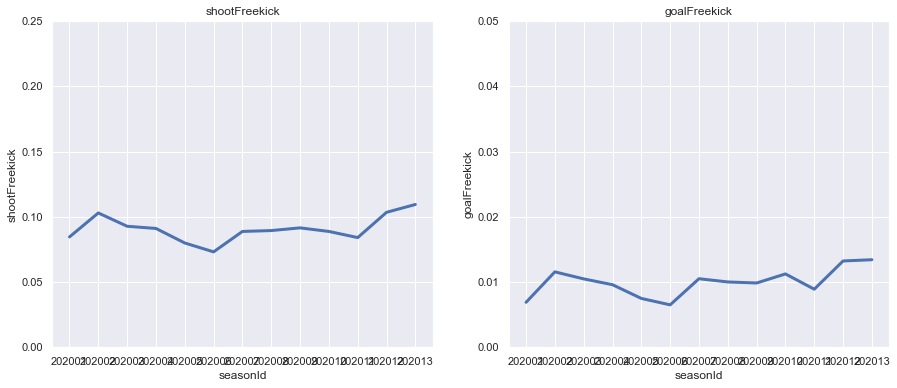

In [31]:
# shootFreekick/goalFreekick
sns.set(rc={'figure.figsize':(15, 6)})

plt.subplot(1,2,1)
plt.ylim((0,  0.25))
sns.lineplot(data = df_month['shootFreekick'], linewidth = 3).set_title("shootFreekick")

plt.subplot(1,2,2)
plt.ylim((0,0.05))
sns.lineplot(data = df_month['goalFreekick'], linewidth = 3).set_title("goalFreekick")

plt.show()

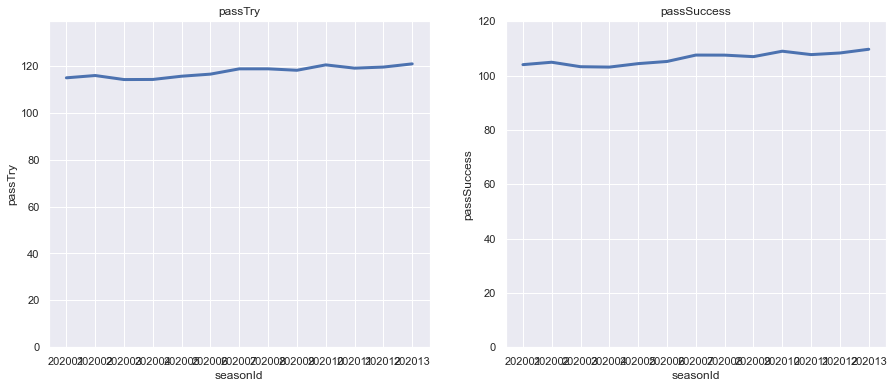

In [32]:
# passTry/passSuccess
sns.set(rc={'figure.figsize':(15, 6)})

plt.subplot(1,2,1)
plt.ylim((0,  139))
sns.lineplot(data = df_month['passTry'], linewidth = 3).set_title("passTry")

plt.subplot(1,2,2)
plt.ylim((0,120))
sns.lineplot(data = df_month['passSuccess'], linewidth = 3).set_title("passSuccess")

plt.show()

패스 전체적으로 보면 크게 달라지지 않았음.  
왜 하위 패스 항목들에서는 202007-202009 사이에 급격히 낮아졌을까?

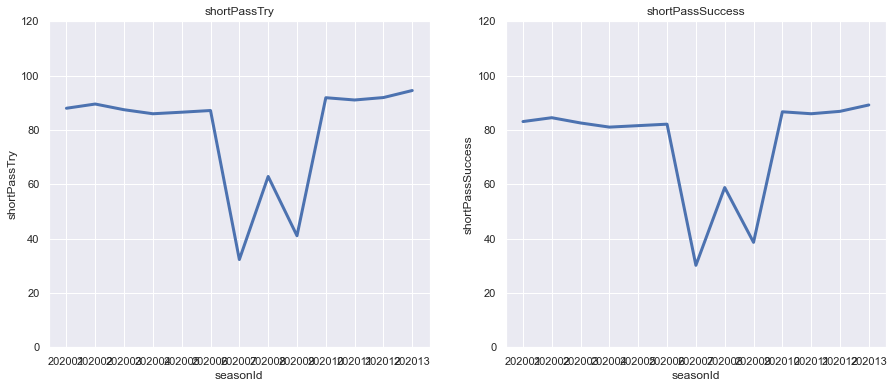

In [33]:
# shortPassTry/shortPassSuccess
sns.set(rc={'figure.figsize':(15, 6)})

plt.subplot(1,2,1)
plt.ylim((0,  120))
sns.lineplot(data = df_month['shortPassTry'], linewidth = 3).set_title("shortPassTry")

plt.subplot(1,2,2)
plt.ylim((0,120))
sns.lineplot(data = df_month['shortPassSuccess'], linewidth = 3).set_title("shortPassSuccess")

plt.show()

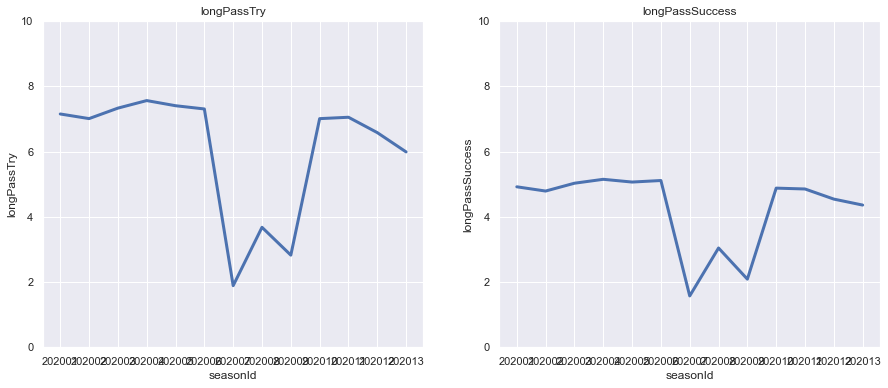

In [34]:
# longPassTry/longPassSuccess
sns.set(rc={'figure.figsize':(15, 6)})

plt.subplot(1,2,1)
plt.ylim((0,  10))
sns.lineplot(data = df_month['longPassTry'], linewidth = 3).set_title("longPassTry")

plt.subplot(1,2,2)
plt.ylim((0,10))
sns.lineplot(data = df_month['longPassSuccess'], linewidth = 3).set_title("longPassSuccess")

plt.show()

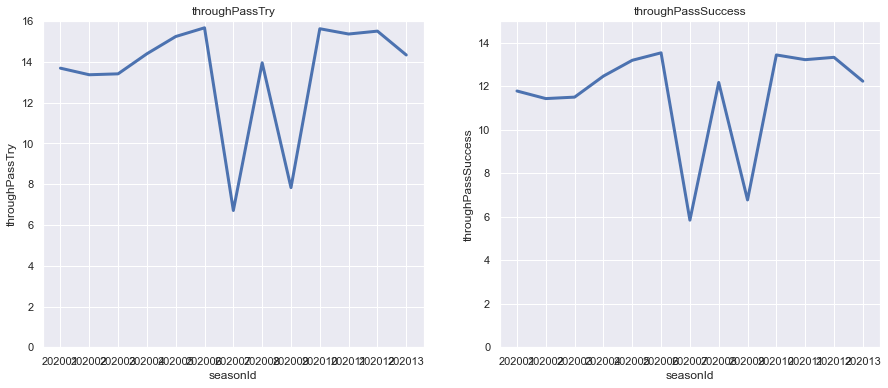

In [35]:
# throughPassTry/throughPassSuccess
sns.set(rc={'figure.figsize':(15, 6)})

plt.subplot(1,2,1)
plt.ylim((0,  16))
sns.lineplot(data = df_month['throughPassTry'], linewidth = 3).set_title("throughPassTry")

plt.subplot(1,2,2)
plt.ylim((0,15))
sns.lineplot(data = df_month['throughPassSuccess'], linewidth = 3).set_title("throughPassSuccess")

plt.show()

### <shortPassTry / shortPassSuccess>  
### <longPassTry/longPassSuccess>  
### <throughPassTry/throughPassSuccess>  
202007-202009에 랭커들이 갑자기 패스를 아주 적게 시도했다고 말하기는 어려움.    
4th 업데이트 후 패스 방식 조정-유저들이 적응하는 과도기였거나 서버쪽 문제일 수도

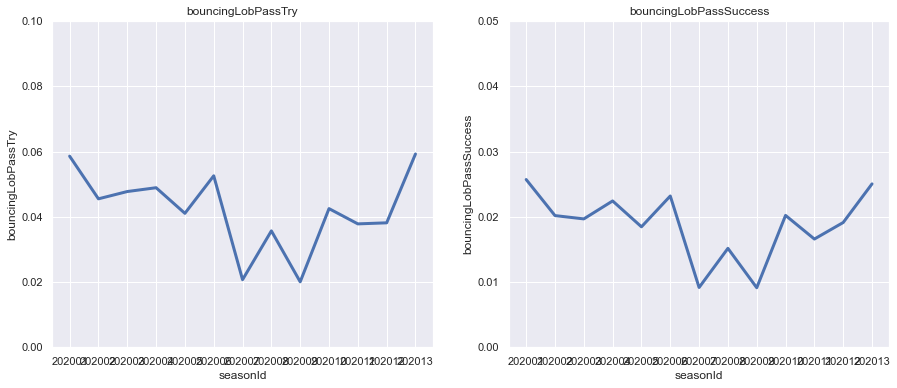

In [36]:
# bouncingLobPassTry/bouncingLobPassSuccess
sns.set(rc={'figure.figsize':(15, 6)})

plt.subplot(1,2,1)
plt.ylim((0,  0.1))
sns.lineplot(data = df_month['bouncingLobPassTry'], linewidth = 3).set_title("bouncingLobPassTry")

plt.subplot(1,2,2)
plt.ylim((0,0.050))
sns.lineplot(data = df_month['bouncingLobPassSuccess'], linewidth = 3).set_title("bouncingLobPassSuccess")

plt.show()

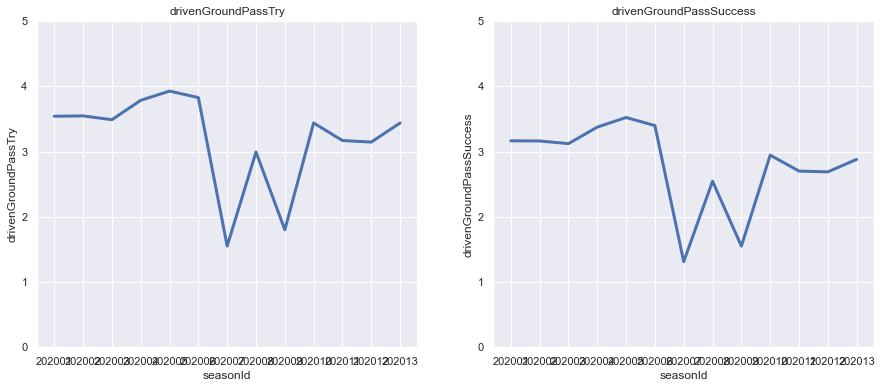

In [37]:
# drivenGroundPassTry/drivenGroundPassSuccess
sns.set(rc={'figure.figsize':(15, 6)})

plt.subplot(1,2,1)
plt.ylim((0,  5))
sns.lineplot(data = df_month['drivenGroundPassTry'], linewidth = 3).set_title("drivenGroundPassTry")

plt.subplot(1,2,2)
plt.ylim((0, 5))
sns.lineplot(data = df_month['drivenGroundPassSuccess'], linewidth = 3).set_title("drivenGroundPassSuccess")

plt.show()

### bouncingLobPassTry/bouncingLobPassSuccess  
### drivenGroundPassTry/drivenGroundPassSuccess  
들쑥날쑥하지만 202007에 특히 낮아진다.  

### throughPassTry/throughPassSuccess  
숏패스, 롱패스와 비슷한 양상

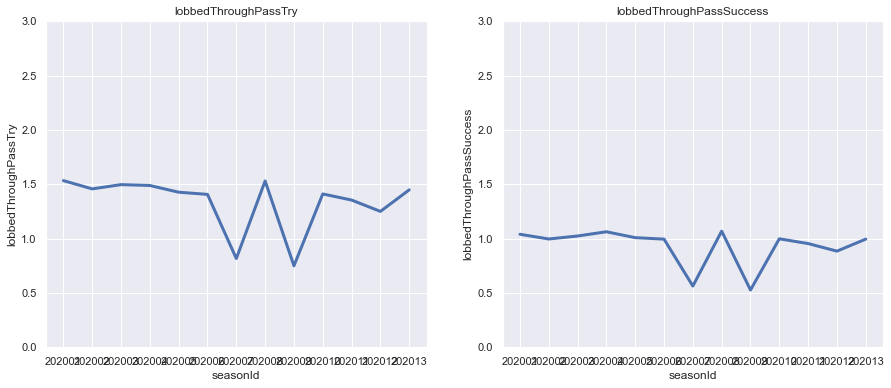

In [38]:
# lobbedThroughPassTry/lobbedThroughPassSuccess
sns.set(rc={'figure.figsize':(15, 6)})

plt.subplot(1,2,1)
plt.ylim((0,  3))
sns.lineplot(data = df_month['lobbedThroughPassTry'], linewidth = 3).set_title("lobbedThroughPassTry")

plt.subplot(1,2,2)
plt.ylim((0,3))
sns.lineplot(data = df_month['lobbedThroughPassSuccess'], linewidth = 3).set_title("lobbedThroughPassSuccess")

plt.show()

202007, 202009에 특히 낮다

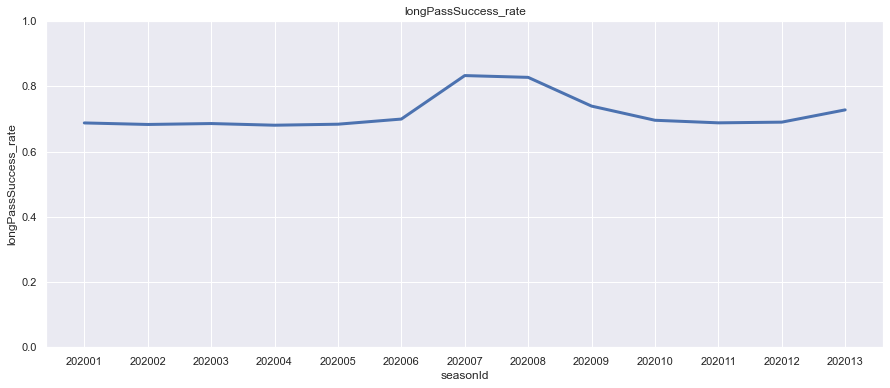

In [39]:
# longPassSuccess_rate
sns.set(rc={'figure.figsize':(15, 6)})

# plt.subplot(1,2,1)
plt.ylim((0,  1))
sns.lineplot(data = df_month['longPassSuccess_rate'], linewidth = 3).set_title("longPassSuccess_rate")

plt.show()

### longPassSuccess_rate

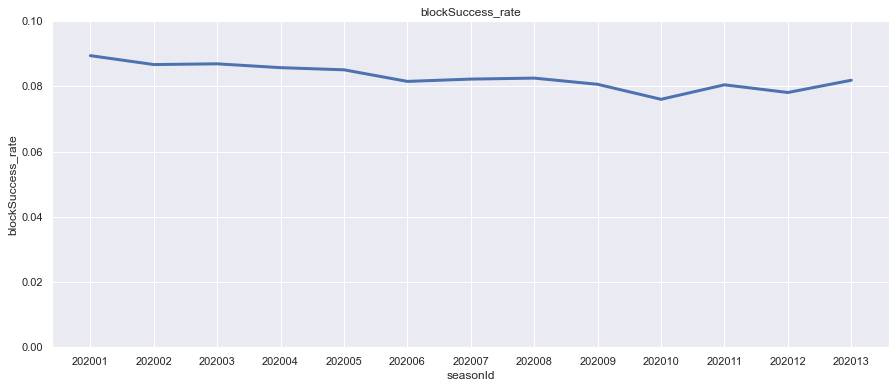

In [40]:
# blockSuccess_rate	
sns.set(rc={'figure.figsize':(15, 6)})

# plt.subplot(1,2,1)
plt.ylim((0,  0.1))
sns.lineplot(data = df_month['blockSuccess_rate'], linewidth = 3).set_title("blockSuccess_rate")

plt.show()

In [41]:
df_month

,systemPause,foul,injury,redCards,yellowCards,dribble,cornerKick,possession,offsideCount,averageRating,shootTotal,effectiveShootTotal,shootOutScore,goalTotal,goalTotalDisplay,ownGoal,shootHeading,goalHeading,shootFreekick,goalFreekick,shootInPenalty,goalInPenalty,shootOutPenalty,goalOutPenalty,shootPenaltyKick,goalPenaltyKick,passTry,passSuccess,shortPassTry,shortPassSuccess,longPassTry,longPassSuccess,bouncingLobPassTry,bouncingLobPassSuccess,drivenGroundPassTry,drivenGroundPassSuccess,throughPassTry,throughPassSuccess,lobbedThroughPassTry,lobbedThroughPassSuccess,blockTry,blockSuccess,tackleTry,tackleSuccess,PassSuccess_rate,shortPassSuccess_rate,longPassSuccess_rate,bouncingLobPassSuccess_rate,drivenGroundPassSuccess_rate,throughPassSuccess_rate,lobbedThroughPassSuccess_rate,blockSuccess_rate,tackleSuccess_rate
seasonId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
202001,0.323522,0.639883,0.149828,0.005304,0.042429,59.837974,1.330682,50.049854,0.299655,4.208216,5.420313,4.153805,0.241050,1.739061,1.760806,0.014320,1.116945,0.361177,0.084593,0.006895,3.894193,1.450544,1.413949,0.246884,0.053567,0.041634,114.845399,103.994696,87.945903,83.055688,7.153540,4.920976,0.058605,0.025723,3.542296,3.165208,13.693185,11.787324,1.533280,1.039777,7.090427,0.634049,13.296208,7.008751,0.905519,0.944395,0.687908,0.438914,0.893547,0.860817,0.678139,0.089423,0.527124
202002,0.227606,0.631791,0.161894,0.006608,0.039464,59.454846,1.399046,49.836821,0.332232,4.154928,5.452276,4.225404,0.285426,1.749633,1.765786,0.017438,1.040749,0.341777,0.102974,0.011564,3.860683,1.429883,1.470264,0.277717,0.055066,0.042034,115.823789,104.880874,89.503488,84.472651,7.011747,4.790565,0.045521,0.020191,3.547357,3.163179,13.370044,11.438142,1.457048,0.996145,7.338840,0.636197,12.924927,6.961454,0.905521,0.943792,0.683220,0.443548,0.891700,0.855505,0.683673,0.086689,0.538607
202003,0.224911,0.616489,0.160213,0.005002,0.041949,66.360923,1.417393,49.879639,0.330106,4.147472,5.591158,4.314295,0.231688,1.767990,1.787996,0.015973,1.168441,0.360762,0.092772,0.010487,3.825266,1.412230,1.661665,0.318813,0.048887,0.036947,114.105357,103.233140,87.407067,82.531946,7.332849,5.030494,0.047757,0.019684,3.489029,3.121813,13.414489,11.505486,1.496128,1.023717,7.425621,0.645369,13.097773,6.888674,0.904718,0.944225,0.686022,0.412162,0.894751,0.857691,0.684245,0.086911,0.525942
202004,0.210974,0.637924,0.156778,0.004460,0.043384,86.577781,1.413434,49.767942,0.353561,4.154705,5.573186,4.242465,0.246925,1.782403,1.803892,0.021354,1.257873,0.429518,0.091093,0.009596,3.786728,1.435599,1.669955,0.309501,0.050412,0.037302,114.146777,103.094337,85.924855,81.010812,7.564401,5.150696,0.048926,0.022435,3.786187,3.375321,14.398432,12.472361,1.488309,1.062711,7.390053,0.633599,13.360724,7.101230,0.903173,0.942810,0.680913,0.458564,0.891483,0.866230,0.714039,0.085737,0.531500
202005,0.232627,0.644924,0.175536,0.005812,0.037458,87.187548,1.431413,50.017825,0.367476,4.159941,5.500387,4.260269,0.236244,1.796177,1.815422,0.017050,1.241540,0.431413,0.079954,0.007492,3.799923,1.460604,1.583312,0.298631,0.047662,0.036941,115.531516,104.369155,86.497029,81.553604,7.406872,5.066391,0.041075,0.018471,3.927796,3.522991,15.244898,13.199303,1.426505,1.008396,7.366314,0.626711,13.574787,7.173469,0.903383,0.942849,0.684012,0.449686,0.896938,0.865818,0.706900,0.085078,0.528441
202006,0.219983,0.633711,0.163833,0.004198,0.035474,87.441226,1.328715,49.894312,0.367024,4.146282,5.220403,4.071998,0.217359,1.767422,1.787993,0.018367,1.078505,0.389694,0.073153,0.006507,3.705814,1.456129,1.393682,0.274244,0.050483,0.037049,116.418136,105.165197,87.118493,82.091730,7.307515,5.113665,0.052582,0.023195,3.827666,3.399244,15.673174,13.542401,1.406591,0.994962,7.403862,0.603589,14.012594,7.444689,0.903340,0.942300,0.699782,0.441118,0.888072,0.864050,0.707357,0.081524,0.531286
202007,0.198404,0.664852,0.164778,0.003579,0.036833,90.416194,1.253281,49.985535,0.379138,4.131796,4.992619,3.894647,0.257754,1.646958,1.66768

발표->도메인 지식 3-4 페이지  
스포츠 데이터가 아닌 게임 데이터  
피파 온라인이란 무엇인가? -> 게임이다/ 흐름에 민감하다/ 스포츠+게임/ 다른 스포츠 게임과의 구별되는 특징/ 피파온라인4 축구 게임 중에 / 피파온라인4 게임을 하는 비율/ 인기!/피씨방 점유율-스포츠 게임 중에서, 전체 게임 중에서/피파온라인4가 이전 시즌과 구분되는 점은?  
데이터에 대한 전체적인 개요  
랭커 정보를 가져와서->랭커 정보의 최근 1500 경기  
한 랭커 당 1500경기/ ->몰수승, 몰수패 제거
플롯

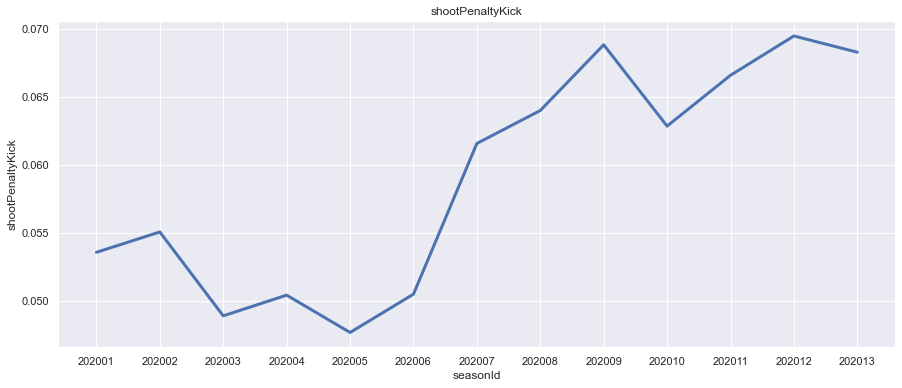

In [42]:
sns.set(rc={'figure.figsize':(15, 6)})

sns.lineplot(data = df_month['shootPenaltyKick'], linewidth = 3).set_title("shootPenaltyKick")

plt.show()

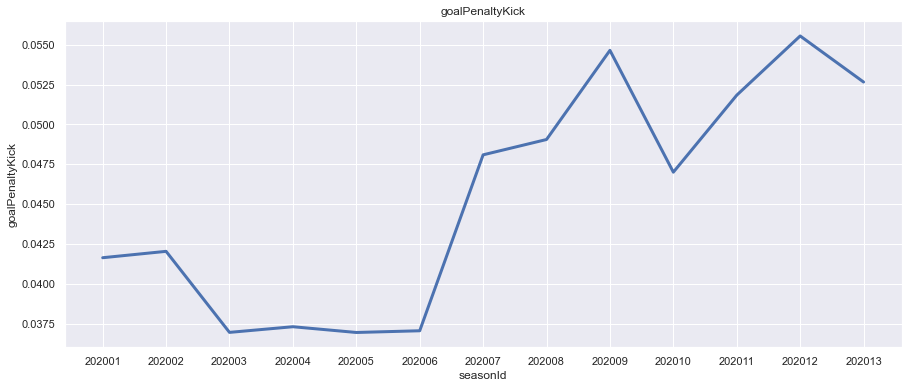

In [43]:
sns.set(rc={'figure.figsize':(15, 6)})

sns.lineplot(data = df_month['goalPenaltyKick'], linewidth = 3).set_title("goalPenaltyKick")

plt.show()